# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:

# Set the API base URL
 # YOUR url CODE HERE
url = "http://api.openweathermap.org/data/2.5/weather?appid=bf04bb2c45e2508a2ea3c608074d5df0&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    #city_url = url+city
    city_url = f"{url}{city}"
    city_url
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity=city_weather["main"]["humidity"]
        city_clouds=city_weather["clouds"]["all"]
        city_wind=city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
        city_date=city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        #print("City not found. Skipping...")
        pass

#     pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | laela
Processing Record 2 of Set 1 | karratha
Processing Record 3 of Set 1 | qionghai
Processing Record 4 of Set 1 | remire-montjoly
Processing Record 5 of Set 1 | lycksele
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | mikhaylovskoye
Processing Record 8 of Set 1 | takoradi
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | markovo
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | mandera
Processing Record 15 of Set 1 | weno
Processing Record 16 of Set 1 | san lawrenz
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | bernardo de irigoyen
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | vorgashor
Processing Record 22 of S

In [ ]:
print(city_data)

[{'City': 'igarka', 'Lat': 67.4667, 'Lng': 86.5833, 'Max Temp': 252.39, 'Humidity': 91, 'Cloudiness': 100, 'Wind Speed': 5.25, 'Country': 'RU', 'Date': 1731348836}, {'City': 'talnakh', 'Lat': 69.4865, 'Lng': 88.3972, 'Max Temp': 245.08, 'Humidity': 91, 'Cloudiness': 29, 'Wind Speed': 0.76, 'Country': 'RU', 'Date': 1731348837}, {'City': 'edinburgh of the seven seas', 'Lat': -37.0676, 'Lng': -12.3116, 'Max Temp': 286.12, 'Humidity': 81, 'Cloudiness': 99, 'Wind Speed': 7.58, 'Country': 'SH', 'Date': 1731348838}, {'City': 'west island', 'Lat': -12.1568, 'Lng': 96.8225, 'Max Temp': 300.14, 'Humidity': 83, 'Cloudiness': 100, 'Wind Speed': 5.66, 'Country': 'CC', 'Date': 1731348839}, {'City': 'aasiaat', 'Lat': 68.7098, 'Lng': -52.8699, 'Max Temp': 269.96, 'Humidity': 77, 'Cloudiness': 100, 'Wind Speed': 4.27, 'Country': 'GL', 'Date': 1731348840}, {'City': 'georgetown', 'Lat': 5.4112, 'Lng': 100.3354, 'Max Temp': 300.11, 'Humidity': 86, 'Cloudiness': 20, 'Wind Speed': 1.54, 'Country': 'MY', 'Da

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,igarka,67.4667,86.5833,252.39,91,100,5.25,RU,1731348836
1,talnakh,69.4865,88.3972,245.08,91,29,0.76,RU,1731348837
2,edinburgh of the seven seas,-37.0676,-12.3116,286.12,81,99,7.58,SH,1731348838
3,west island,-12.1568,96.8225,300.14,83,100,5.66,CC,1731348839
4,aasiaat,68.7098,-52.8699,269.96,77,100,4.27,GL,1731348840


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,igarka,67.4667,86.5833,252.39,91,100,5.25,RU,1731348836
1,talnakh,69.4865,88.3972,245.08,91,29,0.76,RU,1731348837
2,edinburgh of the seven seas,-37.0676,-12.3116,286.12,81,99,7.58,SH,1731348838
3,west island,-12.1568,96.8225,300.14,83,100,5.66,CC,1731348839
4,aasiaat,68.7098,-52.8699,269.96,77,100,4.27,GL,1731348840


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

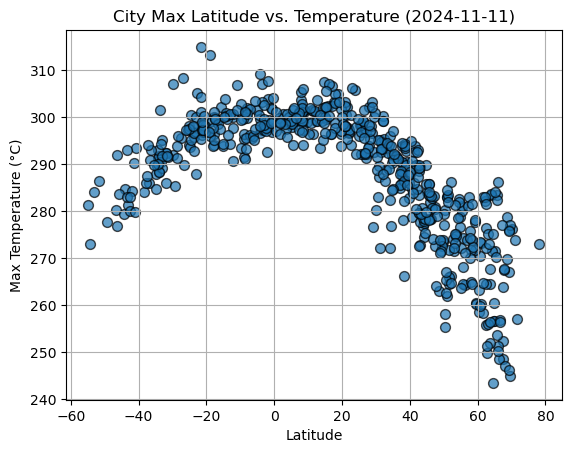

In [10]:

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='k', alpha=0.7, s=50)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

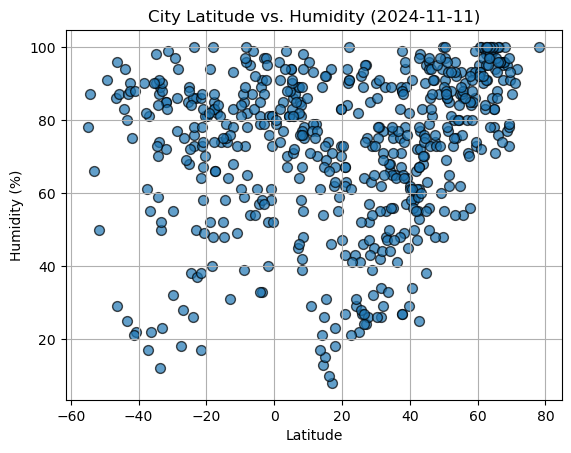

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],edgecolor='k', alpha=0.7, s=50)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

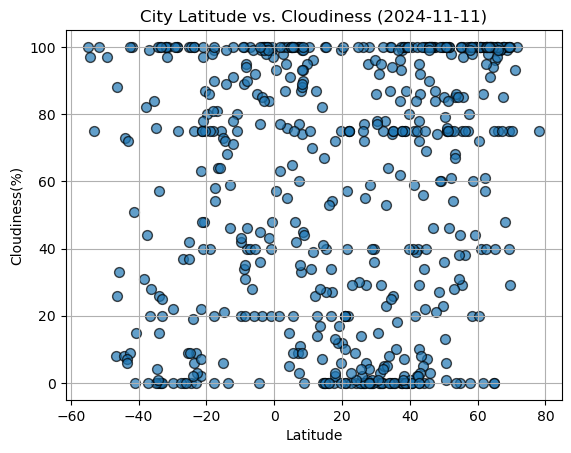

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],edgecolor='k', alpha=0.7, s=50)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

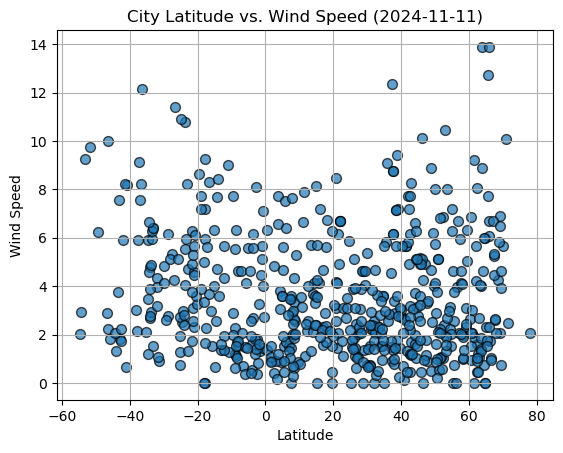

In [13]:
# Build the scatter plots for latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],edgecolor='k', alpha=0.7, s=50)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [95]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept


In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,igarka,67.4667,86.5833,252.39,91,100,5.25,RU,1731348836
1,talnakh,69.4865,88.3972,245.08,91,29,0.76,RU,1731348837
4,aasiaat,68.7098,-52.8699,269.96,77,100,4.27,GL,1731348840
5,georgetown,5.4112,100.3354,300.11,86,20,1.54,MY,1731348841
7,myeik,12.4333,98.6000,299.19,79,87,2.16,MM,1731348843


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,286.12,81,99,7.58,SH,1731348838
3,west island,-12.1568,96.8225,300.14,83,100,5.66,CC,1731348839
6,adamstown,-25.0660,-130.1015,294.06,68,100,1.28,PN,1731348842
8,yauya,-8.9833,-77.3000,291.61,39,89,2.25,PE,1731348845
9,uturoa,-16.7333,-151.4333,299.31,82,81,8.32,PF,1731348846


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7194180565250831


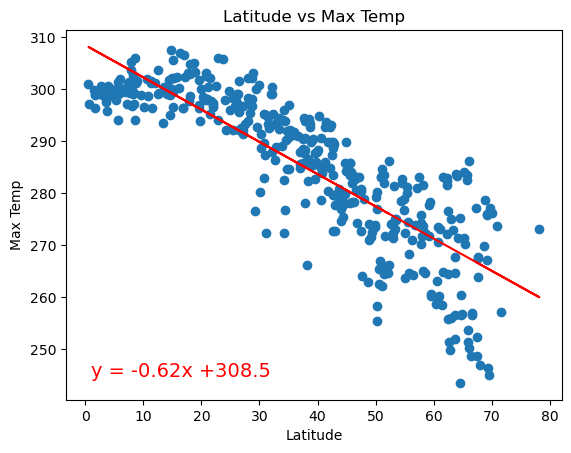

In [82]:
# Linear regression on Northern Hemisphere

x_lat_Nor = northern_hemi_df["Lat"]
y_temp_Nor = northern_hemi_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_Nor, y_temp_Nor)

# Get regression values
regress_values = x_lat_Nor * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_lat_Nor,y_temp_Nor)
plt.plot(x_lat_Nor,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Latitude vs Max Temp")
plt.text(0.05, 0.05, line_eq, transform=plt.gca().transAxes, fontsize=14,color='red', verticalalignment='bottom', horizontalalignment='left')


# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()


The r^2-value is: 0.5144610404907198


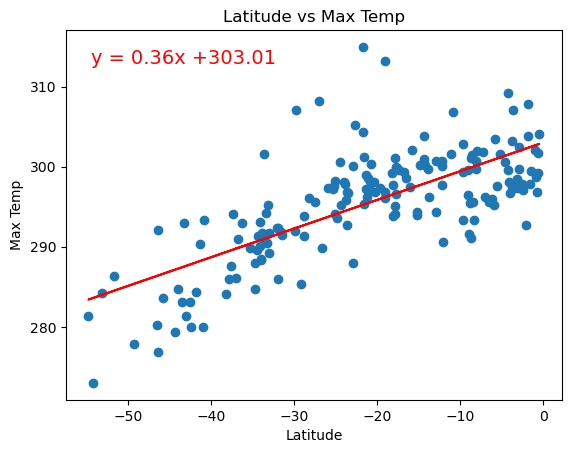

In [83]:
# Linear regression on Southern Hemisphere

x_lat_so = southern_hemi_df["Lat"]
y_temp_sou = southern_hemi_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_so, y_temp_sou)

# Get regression values
regress_values = x_lat_so * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_lat_so,y_temp_sou)
plt.plot(x_lat_so,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.text(0.05, 0.95, line_eq, transform=plt.gca().transAxes, fontsize=14, color='red',verticalalignment='top', horizontalalignment='left')

plt.title(f"Latitude vs Max Temp")



# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** 

In the Northern Hemisphere, a positive correlation between latitude and maximum temperature is observed; with temperatures typically warmer at lower latitudes and cooling as one moves north. 
In the Southern Hemisphere, a negative slope is seen, indicating that temperatures drop as latitude increases towards the poles. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.11427881291977995


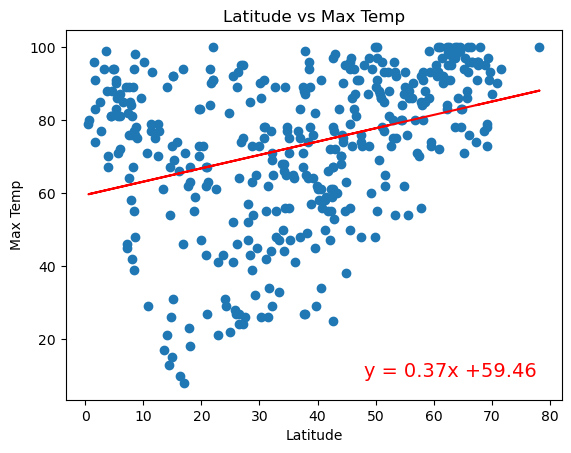

In [84]:
# Linear regression on Northern Hemisphere

x_lat_nor = northern_hemi_df["Lat"]
y_hum_nor = northern_hemi_df["Humidity"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_nor, y_hum_nor)

# Get regression values
regress_values = x_lat_nor * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_lat_nor,y_hum_nor)
plt.plot(x_lat_nor,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.text(0.95, 0.05, line_eq, transform=plt.gca().transAxes, fontsize=14,color='red', verticalalignment='bottom', horizontalalignment='right')

plt.title(f"Latitude vs Max Temp")



# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.003304683237050818


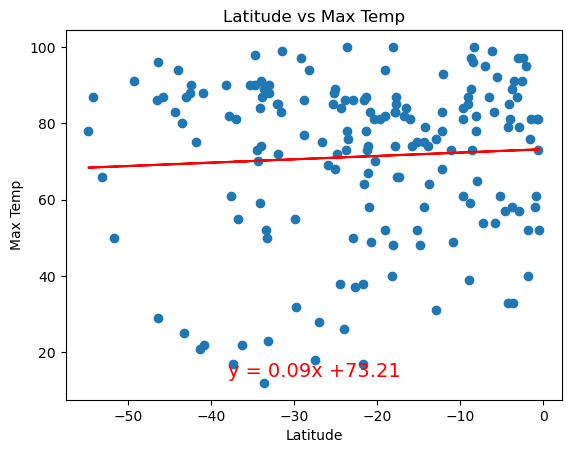

In [85]:
# Linear regression on Southern Hemisphere

x_lat_south = southern_hemi_df["Lat"]
y_hum_south = southern_hemi_df["Humidity"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_hum_south)

# Get regression values
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_lat_south,y_hum_south)
plt.plot(x_lat_south,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.text(0.5, 0.05, line_eq, transform=plt.gca().transAxes, fontsize=14, color= 'red',verticalalignment='bottom', horizontalalignment='center')

plt.title(f"Latitude vs Max Temp")



# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 


The linear regression analysis of latitude versus humidity shows modest trends in both hemispheres. In the Northern Hemisphere, humidity slightly increases with latitude, suggesting a positive correlation that aligns with more humid conditions found at higher latitudes. 

In the Southern Hemisphere, humidity appears more variable but tends to increase at higher southern latitudes

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0697667227700178


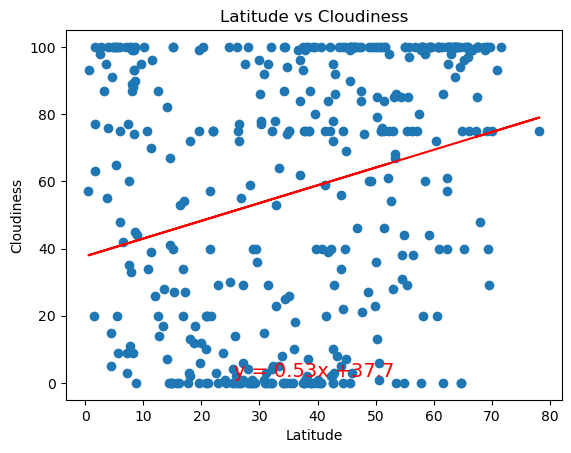

In [86]:
# Linear regression on Northern Hemisphere

x_Lat_North = northern_hemi_df["Lat"]
y_Clou_North = northern_hemi_df["Cloudiness"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat_North, y_Clou_North)

# Get regression values
regress_values = x_Lat_North * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_Lat_North,y_Clou_North)
plt.plot(x_Lat_North,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.text(0.5, 0.05, line_eq, transform=plt.gca().transAxes, fontsize=14, color= 'red',verticalalignment='bottom', horizontalalignment='center')

plt.title(f"Latitude vs Cloudiness")



# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.04094669974588145


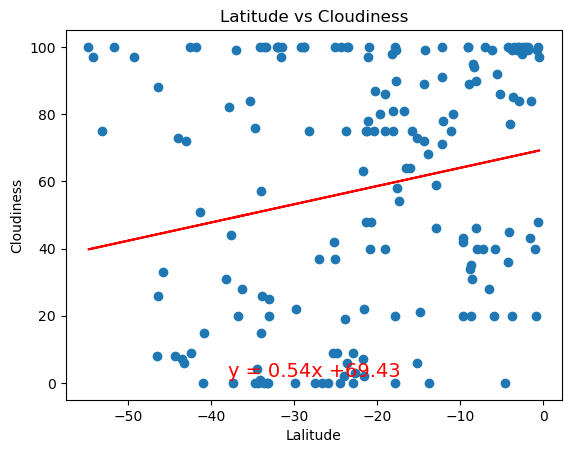

In [87]:
# Linear regression on Southern Hemisphere

x_Lat_south = southern_hemi_df["Lat"]
y_cloud_south = southern_hemi_df["Cloudiness"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat_south, y_cloud_south)

# Get regression values
regress_values = x_Lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_Lat_south,y_cloud_south)
plt.plot(x_Lat_south,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Lalitude')
plt.ylabel('Cloudiness')
plt.text(0.5, 0.05, line_eq, transform=plt.gca().transAxes, fontsize=14, color= 'red',verticalalignment='bottom', horizontalalignment='center')

plt.title(f"Latitude vs Cloudiness")



# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The linear regression analysis of latitude versus cloudiness reveals subtle patterns in both hemispheres. 
In the Northern Hemisphere, cloudiness shows a mild relationship with latitude, suggesting a potential increase in cloud cover at higher latitudes.
In the Southern Hemisphere, cloudiness appears even more variable slight increase near the poles.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.05751514119604497


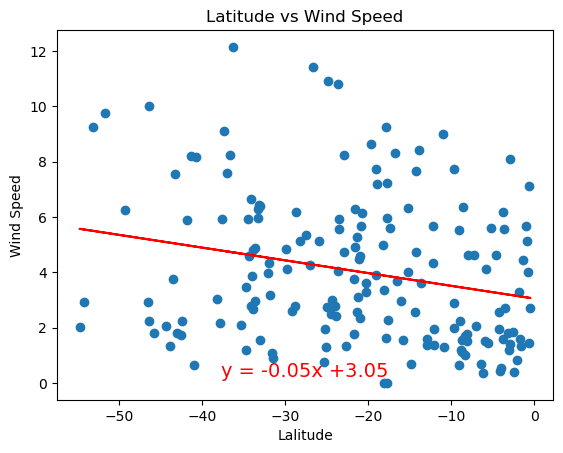

In [90]:
# Linear regression on Southern Hemisphere

x_Lat_South = southern_hemi_df["Lat"]
y_wind_south = southern_hemi_df["Wind Speed"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat_South, y_wind_south)

# Get regression values
regress_values = x_Lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_Lat_South,y_wind_south)
plt.plot(x_Lat_South,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Lalitude')
plt.ylabel('Wind Speed')
plt.text(0.5, 0.05, line_eq, transform=plt.gca().transAxes, fontsize=14, color= 'red',verticalalignment='bottom', horizontalalignment='center')

plt.title(f"Latitude vs Wind Speed")



# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.015145673273343995


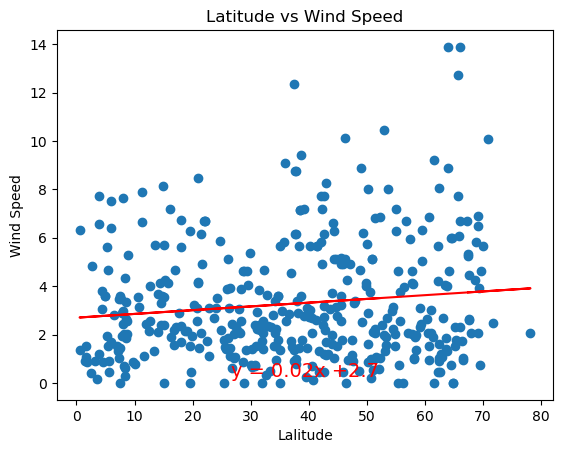

In [92]:
# Linear regression on Northern Hemisphere

x_Lat_north= northern_hemi_df["Lat"]
y_wind_North = northern_hemi_df["Wind Speed"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat_north, y_wind_North)

# Get regression values
regress_values = x_Lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_Lat_north,y_wind_North)
plt.plot(x_Lat_north,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Lalitude')
plt.ylabel('Wind Speed')
plt.text(0.5, 0.05, line_eq, transform=plt.gca().transAxes, fontsize=14, color= 'red',verticalalignment='bottom', horizontalalignment='center')

plt.title(f"Latitude vs Wind Speed")



# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 


In the Northern Hemisphere, the relationship between latitude and wind speed appears weak, with no clear upward or downward trend, suggesting that wind speeds
are influenced by factors other than just latitude. Similarly, in the Southern Hemisphere, the wind speed shows variability across latitudes, with no strong linear relationship. 